Vamos a ver como conectar a SQL SErver con la libreria PyODBC, pero mejora si la combinamos con SQLAlchemy
#pyodbc como front end y SQLAlchemy como Backend, lo que significa que SQLAlchemy es la capa de abstracción que gestiona la DB, y pyosbc gestiona el frontend
Juntos hacen una gestion eficaz y flexible

In [ ]:
from dotenv import load_dotenv
import pandas as pd
import os
from sqlalchemy import create_engine

load_dotenv()  # Carga las variables de entorno del archivo .env

# Datos de conexión
usuario = os.getenv('DB_USER')
contraseña = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
puerto = os.getenv('DB_PORT')
base_datos = os.getenv('DB_NAME')

# Crear el motor de conexión con SQLAlchemy y mysql-connector
conexion_str = f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{base_datos}"
conexion = create_engine(conexion_str)

query = "Select * from pedidos"
pedidos = pd.read_sql(query, conexion)
pedidos



WEB SCRAPPING   - Se trata de cojer datos de una pagina web, para ello usaremos 2 librerias, beautifulsoup + requests
pip install beautifulsoup4
pip install requests
instalamos desde el prompt de terminal
> pip install beautifulsoup4
> pip install requests


In [ ]:
import requests
from bs4 import BeautifulSoup
import sys  #  Llamamos la libreria de systema para control de errores

url = "https://www.elperiodico.com/es/"
url2 = "https://www.lavanguardia.com"

# Defiir headers para evitar bloqueos por parte del servidor
headers = {
    "User-Agent" : "Safari/18.5"
}

# REalizamos la solicitud a la pagina headers y lo hacemos con controld e errores try -except
try:
    response = requests.get(url, headers=headers)
    
except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud: {e}")
    # Salir con un codigo de error
    sys.exit(1)

# Parsear el contenido HTML con Beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser')

# buscanos las etiquetas h2 que corresponden a los titulares de noticias
articulos = soup.find_all('h2')

for articulo in articulos:
    # Imprimimos el texto de cada titular
    print(articulo.get_text(strip=True))
    print("-----")



In [ ]:
# Ejemplo de scrapping de libros, solo titulos y precios

import requests
from bs4 import BeautifulSoup

url = "https://books.toscrape.com/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

libros = soup.find_all('article', class_="product_pod")

for libro in libros:
    print(libro.h3.a['title'])
    print(libro.find('p', class_= "price_color").text)
    #La calificación de los libros class_='satar-rating' y la categoria 
    print(libro.find('p', class_="star-rating")['class'][1])
    categoria = libro_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()
    print("-----")



###   PRACTICA 34 
Mediante web scrapping sobre la web de libros https://books.toscrape.com 
Guardaremos en un fichero de excel todos los libros de las categorias Fiction y Travel

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://books.toscrape.com/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

libros = soup.find_all('article', class_="breadcrumb")

for libro in libros:
    print(libro.find('p', class_="page header-action")['class']['fiction])
                                                                


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin

BASE_URL = "https://books.toscrape.com/"
CATEGORIES = ["Fiction", "Travel"]
HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_category_urls():
    response = requests.get(BASE_URL, headers=HEADERS)
    soup = BeautifulSoup(response.text, 'html.parser')
    category_links = {}

    for a in soup.select('.side_categories ul li ul li a'):
        name = a.text.strip()
        if name in CATEGORIES:
            category_links[name] = urljoin(BASE_URL, a['href'])
    return category_links

def scrape_category(name, url):
    books = []
    while url:
        response = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(response.text, 'html.parser')
        for article in soup.select('article.product_pod'):
            title = article.h3.a['title']
            price = article.select_one('.price_color').text.strip()
            availability = article.select_one('.availability').text.strip()
            books.append({
                "Categoría": name,
                "Título": title,
                "Precio": price,
                "Disponibilidad": availability
            })

        next_page = soup.select_one('li.next a')
        if next_page:
            url = urljoin(url, next_page['href'])
        else:
            url = None
    return books

def main():
    category_urls = get_category_urls()
    all_books = []

    for category, url in category_urls.items():
        print(f"Scrapeando categoría: {category}")
        books = scrape_category(category, url)
        all_books.extend(books)

    df = pd.DataFrame(all_books)
    df.to_excel("libros_fiction_travel.xlsx", index=False)
    print("Archivo 'libros_fiction_travel.xlsx' creado correctamente.")

if __name__ == "__main__":
    main()

<Figure size 600x500 with 0 Axes>

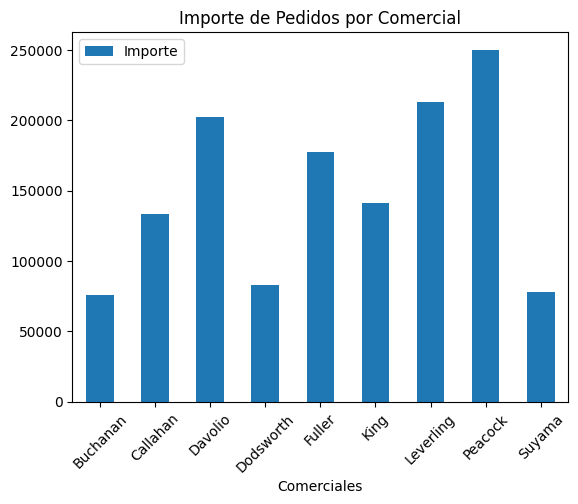

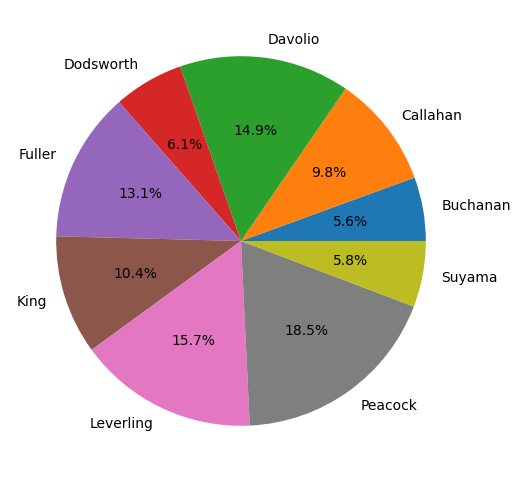

,Fecha de Pedido,Fecha de Entrega,Tiempo,Cliente,Ciudad,Region,Pais,Comercial,Transportista,Producto,Precio/Unidad,Cantidad,Categoria,Subcategorias,Proveedor,Importe,Mes,Año,Día,Día de la Semana
0,1996-08-20,1996-09-17,28,QUICK-Stop,Cunewalde,NaN,Alemania,Davolio,United Package,Té Dharamsala,14.4,45,Bebidas,Cafes-Tes,Exotic Liquids,648.0,8,1996,20,1
1,1996-08-30,1996-09-27,28,Rattlesnake Canyon Grocery,Albuquerque,NM,Estados Unidos,Peacock,United Package,Té Dharamsala,14.4,18,Bebidas,Cafes-Tes,Exotic Liquids,259.2,8,1996,30,4
2,1996-09-30,1996-10-28,28,Lonesome Pine Restaurant,Portland,OR,Estados Unidos,Suyama,Speedy Express,Té Dharamsala,14.4,20,Bebidas,Cafes-Tes,Exotic Liquids,288.0,9,1996,30,0
3,1996-11-07,1996-12-05,28,Die Wandernde Kuh,Stuttgart,NaN,Alemania,Peacock,United Package,Té Dharamsala,14.4,15,Bebidas,Cafes-Tes,Exotic Liquids,216.0,11,1996,7,3
4,1996-11-14,1996-12-12,28,Pericles Comidas clásicas,México D.F.,NaN,México,Callahan,Federal Shipping,Té Dharamsala,14.4,12,Bebidas,Cafes-Tes,Exotic Liquids,172.8,11,1996,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,1998-02-24,1998-03-24,28,Hanari Carnes,Río de Janeiro,RJ,Brasil,Leverling,Federal Shipping,Barras de pan de Escocia,12.5,20,Repostería,NaN,"Specialty Biscuits, Ltd.",250.0,2,1998,24,1
2151,1998-03-11,1998-04-08,28,Save-a-lot Markets,Boise,ID,Estados Unidos,King,United Package,Barras de pan de Escocia,12.5,80,Repostería,NaN,"Specialty Biscuits, Ltd.",1000.0,3,1998,11,2
2152,1998-04-09,1998-05-07,28,Romero y tomillo,Madrid,NaN,España,Fuller,Speedy Express,Barras de pan de Escocia,12.5,2,Repostería,NaN,"Specialty Biscuits, Ltd.",25.0,4,1998,9,3
2153,1998-04-24,1998-05-22,28,Bottom-Dollar Markets,Tsawassen,BC,Canadá,King,Federal Shipping,Barras de pan de Escocia,12.5,42,Repostería,NaN,"Specialty Biscuits, Ltd.",525.0,4,1998,24,4


In [44]:
# Vamos a cargar el excel Datos pedidos.xlx

import pandas as pd


pedidos = pd.read_excel("/Users/rogerdefez/Documents/VSCWorkspace/Data-Science-Project/Datos para ejercicios/Datos Pedidos.xlsx", sheet_name="Datos")
pedidos_comercial = pedidos.groupby("Comercial").Importe.sum()
pedidos_comercial = pd.DataFrame(pedidos_comercial)
pedidos_comercial= pedidos_comercial.reset_index()
pedidos_comercial


import matplotlib.pyplot as plt
# Primero reservar espacio en el kernel para que me cree la figura
plt.figure(figsize=(6, 5))
# Ahora creamos el grafico de columnas
#pedidos_comercial.plot(kind='bar')
pedidos_comercial.plot(kind='bar', x='Comercial', y='Importe')
plt.title("Importe de Pedidos por Comercial")
plt.xlabel("Comerciales")
plt.xticks(rotation=45)

# grafico circular
plt.figure(figsize=(6, 6))
#pedidos_comercial.plot(kind='pie', x='Comercial', y='Importe', labels=pedidos_comercial['Comercial'], autopct='%1.1f%%', legend=False)
#VAmos a darle el porcentaje % usaremos autopct='%1.1f%%' para que nos muestre el porcentaje con un decimal#
plt.pie(pedidos_comercial['Importe'], labels=pedidos_comercial['Comercial'], autopct='%1.1f%%')
plt.show()

# Gráfico de lineas, para ello del dataframe original calcularemos el mes
# Convertir la columna Fecha a tipo datetime usaremos el accesor dt
pedidos['Fecha de Pedido'] = pd.to_datetime(pedidos['Fecha de Pedido'])
# Extraer el mes y el año y el dia de la fecha
pedidos['Mes'] = pedidos['Fecha de Pedido'].dt.month
pedidos['Año'] = pedidos['Fecha de Pedido'].dt.year
pedidos['Día'] = pedidos['Fecha de Pedido'].dt.day
#Dia de la seman del 0 al 6, seria con dt.dayofweek
pedidos['Día de la Semana'] = pedidos['Fecha de Pedido'].dt.dayofweek
pedidos

